##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**
--------------------------------------------------------------------------------
***Team number: 13***

---
***Full names of all students in the team: ANIRUDH BAGALKOTKER, KARTIK PANDEY, ADWAIT KULKARNI, JOY SINHA***

---
***Id number of all students in the team: 2021A7PS2682H, 2021A7PS2574H, 2021A7PS2995H, 2021A8PS1606H***


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**

### The respective dataset has been shared in the project brief. Please refer to it.

### **Import Dependencies and Load Dataset**

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [270]:
# Load the dataset
df = pd.read_csv('./water_portability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **Exploratory Data Analysis**

In [271]:
df.shape

(3276, 10)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [273]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [274]:
df['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

In [275]:
df.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

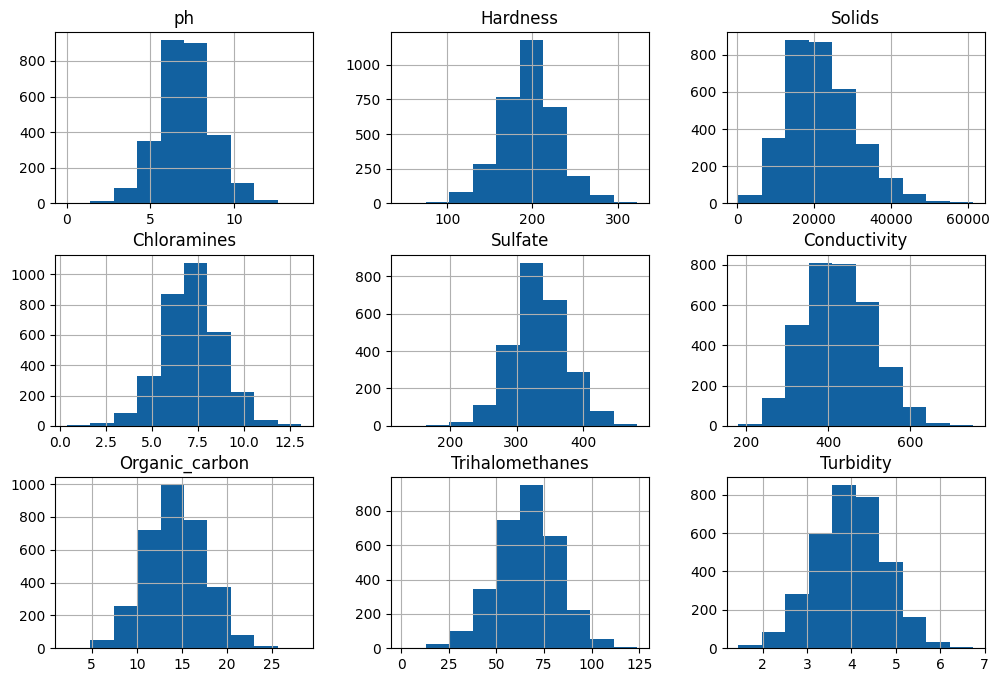

In [276]:
df.drop('Potability', axis = 1).hist(figsize=(12,8), color="#1261A0");

In [277]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


In [278]:
fig = go.Figure(go.Heatmap(z=df.corr(), x=df.corr().columns.tolist(), y=df.corr().columns.tolist(), colorscale='Viridis'))
fig.show()

### **Data Preprocessing**

In [279]:
# Check if there are any missing values
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [280]:
# Handle missing values (if any) by replacing them with the mean
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [281]:
# Normalize the dataset (Check if the column name is not "Potability". if not then apply normalization)
for col in df.columns:
    if col != 'Potability':
        df[col] = (df[col] - np.mean(df[col])) / np.std(df[col])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0


### **Generate Random Test and Train Splits**

In [282]:
seed = 420
train_fraction = 0.8
train = df.sample(frac=train_fraction, random_state=seed)
test = df.drop(train.index)

In [283]:
train.info

<bound method DataFrame.info of                 ph  Hardness    Solids  Chloramines       Sulfate  \
2043  3.216080e-02 -0.151140  0.366530    -0.325005 -4.019393e-01   
1952 -4.328949e-01 -0.904473  0.324132     1.497359 -1.282986e+00   
3236 -1.573976e+00  1.827556  2.964878    -0.852325  3.145987e-15   
1434  1.644569e-01 -0.008067 -0.282834    -0.291323 -9.943908e-01   
2725  4.763279e-01  0.774911  2.106667    -0.616725 -8.701890e-01   
...            ...       ...       ...          ...           ...   
861  -6.043133e-16 -0.353426  0.739688    -0.361530 -8.457315e-02   
51    4.958983e-01 -2.917494 -1.140673    -1.206665 -2.395736e+00   
1673  5.413918e-01  1.658633 -0.715506     0.602373  3.145987e-15   
1018 -7.264140e-01  0.683618 -0.050226     1.373209 -3.488787e-01   
362  -1.390345e-01 -0.168062 -0.003999    -0.942430  8.317196e-01   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2043     -0.085385       -0.429187         0.765639   0.696956

In [284]:
test.info

<bound method DataFrame.info of                 ph  Hardness    Solids  Chloramines       Sulfate  \
2     6.928678e-01  0.847665 -0.240047     1.360594  3.145987e-15   
3     8.409504e-01  0.547651  0.000493     0.592008  6.395190e-01   
5    -1.018355e+00 -0.245057  0.768155     0.266983 -1.964024e-01   
15   -4.990862e-01 -0.293131  2.172994     1.584061  8.498721e-01   
18    1.289126e+00  2.524360 -0.291277    -0.579941  3.145987e-15   
...            ...       ...       ...          ...           ...   
3257 -2.704077e-01  2.303963 -0.345009    -1.128397  7.691054e-02   
3260 -6.043133e-16 -1.874772 -1.484399     1.202909  3.145987e-15   
3262  8.826874e-01  0.065148  0.736847    -0.407634 -3.956762e-01   
3265  7.597026e-01  0.204887  0.648745    -0.410251 -1.352887e-01   
3274 -1.329516e+00  1.041355 -1.144058    -0.517373  3.145987e-15   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
2        -0.094032        0.781117         0.001509  -1.167365

In [285]:
# Assuming 'Potability' is the column you want to predict
X_train = train.drop('Potability', axis=1)  # Features for training
y_train = train['Potability']  # Target for training

X_test = test.drop('Potability', axis=1)  # Features for testing
y_test = test['Potability']  # Target for testing

# Convert labels to numpy array for applying ML Models
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [286]:
# Compute Accuracy of the model
accuracies = []

def accuracy(pred, y_test):
	return 100*(pred==y_test).mean()

# ***2. ML Model 1: Perceptron***

In [287]:
# Implementing Perceptron
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def train(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for epoch in range(self.epochs):
            for xi, target in zip(X, y):
                # Calculate the predicted value
                predicted = self.predict(xi)
                
                # Update weights and bias based on the perceptron learning rule
                update = self.learning_rate * (target - predicted)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        # Calculate the dot product of weights and input features, add bias, and apply the step function
        return np.where(np.dot(X, self.weights) + self.bias > 0, 1, 0)


# Instantiate the Perceptron model
perceptron_model = Perceptron(learning_rate=0.01, epochs=100)

# Train the model
perceptron_model.train(X_train.values, y_train)

# Make predictions on the test set
predictions = perceptron_model.predict(X_test.values)

# Evaluate the accuracy of the model
acc = np.mean(predictions == y_test)
accuracies.append(acc)
print("Accuracy:", acc*100)


Accuracy: 53.58778625954198


# ***3. ML Model 2: Fisher Discriminant***



In [288]:
class FisherLinearDiscriminant:
    def __init__(self):
        self.w = None

    def train(self, X, y):
        unique_classes = np.unique(y)
        n_features = X.shape[1]

        # Calculate the mean for each class
        class_means = [np.mean(X[y == cls], axis=0) for cls in unique_classes]

        # Calculate the overall mean
        overall_mean = np.mean(X, axis=0)

        # Calculate between-class scatter matrix and within-class scatter matrix
        S_B = np.zeros((n_features, n_features))
        S_W = np.zeros((n_features, n_features))

        for i, cls in enumerate(unique_classes):
            n = np.sum(y == cls)
            mean_diff = class_means[i] - overall_mean

            S_B += n * np.outer(mean_diff, mean_diff)

            class_scatter = np.cov(X[y == cls], rowvar=False)
            S_W += (n - 1) * class_scatter

        # Solving the eigenvalue problem to find w
        eigenvalues, eigenvectors = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))
        
        # Sorting eigenvalues and eigenvectors in descending order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # Top eigenvalue is chosen as the discriminant direcetion
        self.w = eigenvectors[:, 0]

    def predict(self, X):
        # Project data onto the discriminant direction
        projections = X.dot(self.w)

        # Threshold for binary classification
        threshold = np.median(projections)

        # Classify based on the projection
        predictions = np.where(projections > threshold, 1, 0)

        return predictions
        
flda =  FisherLinearDiscriminant()
flda.train(X_train, y_train)

y_pred= flda.predict(X_test)

# Evaluate the accuracy of the model
acc = accuracy(y_pred,y_test)
accuracies.append(acc)
acc


55.87786259541985

# ***4. ML Model 3: KNN***

55.254835867494855


56.442644107206185


58.18834565987518


54.56496386123592


55.556449224762275




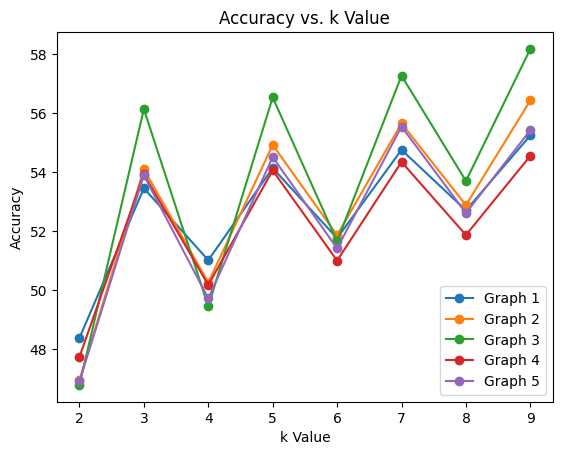

51.45038167938931

In [289]:
class kNN():
  def __init__(self, k = 3, metric = 'euclidean', p=None):
    self.k = k
    self.metric = metric
    self.p = p

  def euclid(self, pt1, pt2):
    return np.sqrt(np.sum(pt1 - pt2)**2)

  def manhat(self, pt1, pt2):
    return np.sum(np.abs(pt1-pt2))

  def minkowski(self, pt1, pt2):
    return np.sum(np.abs(pt1-pt2)**self.p)**(1/self.p)

  def fit(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def predict(self, X_test):
    pred = []

    for row in X_test:
      near_neighbours = self.get_neighbours(row)
      majority = self.maj(near_neighbours)
      pred.append(majority)
    return np.array(pred)

  def get_neighbours(self, test_row):
    distances = list()

    for (train_row, train_class) in zip(self.X_train, self.y_train):
      if self.metric == 'euclidean':
        dist = self.euclid(train_row, test_row)
      elif self.metric == 'manhattan':
        dist = self.manhat(train_row, test_row)
      elif self.metric == 'minkowski':
        dist = self.minkowski(train_row, test_row)
      else:
        raise NameError('Not written the supported metrics')
      distances.append((dist, train_class))

    distances.sort(key = lambda x: x[0])

    neighbours = list()
    for i in range(self.k):
      neighbours.append(distances[i][1])

    return neighbours

  def maj(self, near_neighbours):
    pos_class = 0
    neg_class = 0
    for i in near_neighbours:
      if i == 1:
        pos_class = pos_class + 1
      else:
        neg_class = neg_class + 1

    if pos_class >= neg_class:
      return 1
    else:
      return 0

class CrossValidation:
  def fitcross(self, X_train, y_train):
    self.X_train = X_train
    self.y_train = y_train

  def findK(self):
      X = self.X_train
      y = self.y_train

      no_rows = y.shape[0]
      max_k = round(np.sqrt(round(no_rows)) / 5)
      # We will be using 5-fold validation
      interval = int(no_rows / 5)
      # print(max_k)
      fold1_x = X.iloc[0 : interval - 1]
      fold2_x = X.iloc[interval : 2*interval - 1]
      fold3_x = X.iloc[2*interval : 3*interval - 1]
      fold4_x = X.iloc[3*interval : 4*interval - 1]
      fold5_x = X.iloc[4*interval : 5*interval - 1]

      fold1_y = y.iloc[0 : interval - 1]
      fold2_y = y.iloc[interval : 2*interval - 1]
      fold3_y = y.iloc[2*interval : 3*interval - 1]
      fold4_y = y.iloc[3*interval : 4*interval - 1]
      fold5_y = y.iloc[4*interval : 5*interval - 1]

      train_val1_x = pd.concat([fold1_x, fold2_x, fold3_x, fold4_x])
      test_val1_x = fold5_x
      train_val1_x.head()
      train_val2_x = pd.concat([fold1_x, fold2_x, fold3_x, fold5_x])
      test_val2_x = fold4_x

      train_val3_x = pd.concat([fold1_x, fold2_x, fold4_x, fold5_x])
      test_val3_x = fold3_x

      train_val4_x = pd.concat([fold1_x, fold3_x, fold4_x, fold5_x])
      test_val4_x = fold2_x

      train_val5_x = pd.concat([fold2_x, fold3_x, fold4_x, fold5_x])
      test_val5_x = fold1_x

      train_val1_y = pd.concat([fold1_y, fold2_y, fold3_y, fold4_y])
      test_val1_y = fold5_y

      train_val2_y = pd.concat([fold1_y, fold2_y, fold3_y, fold5_y])
      test_val2_y = fold4_y

      train_val3_y = pd.concat([fold1_y, fold2_y, fold4_y, fold5_y])
      test_val3_y = fold3_y

      train_val4_y = pd.concat([fold1_y, fold3_y, fold4_y, fold5_y])
      test_val4_y = fold2_y

      train_val5_y = pd.concat([fold2_y, fold3_y, fold4_y, fold5_y])
      test_val5_y = fold1_y

      accuracy_values1 = []
      k_values1 = []

      k1 = 0
      max_acc = 0
      for i in range(2, max_k):
        clf = kNN(i, metric = 'euclidean')
        clf.fit(train_val1_x.values, train_val1_y.values)
        preds = clf.predict(test_val1_x.values)
        acc = accuracy(preds, test_val1_y.values)
        # print(acc)
        accuracy_values1.append(acc)
        k_values1.append(i)
        if acc > max_acc:
          max_k1 = i
          max_acc = acc
      print(max_acc)

      accuracy_values2 = []
      k_values2 = []
      print('\n')
      k2 = 0
      max_acc = 0
      for i in range(2, max_k):
        clf = kNN(i, metric = 'euclidean')
        clf.fit(train_val2_x.values, train_val2_y.values)
        preds = clf.predict(test_val2_x.values)
        acc = accuracy(preds, test_val2_y.values)
        accuracy_values2.append(acc)
        k_values2.append(i)
        # print(acc)
        if acc > max_acc:
          max_k2 = i
          max_acc = acc
      print(max_acc)


      accuracy_values3 = []
      k_values3 = []
      print('\n')
      k3 = 0
      max_acc = 0
      for i in range(2, max_k):
        clf = kNN(i, metric = 'euclidean')
        clf.fit(train_val3_x.values, train_val3_y.values)
        preds = clf.predict(test_val3_x.values)
        acc = accuracy(preds, test_val3_y.values)
        accuracy_values3.append(acc)
        k_values3.append(i)
        # print(acc)
        if acc > max_acc:
          max_k3 = i
          max_acc = acc
      print(max_acc)

      accuracy_values4 = []
      k_values4 = []
      print('\n')
      k4 = 0
      max_acc = 0
      for i in range(2, max_k):
        clf = kNN(i, metric = 'euclidean')
        clf.fit(train_val4_x.values, train_val4_y.values)
        preds = clf.predict(test_val4_x.values)
        acc = accuracy(preds, test_val4_y.values)
        accuracy_values4.append(acc)
        k_values4.append(i)
        # print(acc)
        if acc > max_acc:
          max_k4 = i
          max_acc = acc
      print(max_acc)

      accuracy_values5 = []
      k_values5 = []
      print('\n')
      k5 = 0
      max_acc = 0
      for i in range(2, max_k):
        clf = kNN(i, metric = 'euclidean')
        clf.fit(train_val5_x.values, train_val5_y.values)
        preds = clf.predict(test_val5_x.values)
        acc = accuracy(preds, test_val5_y.values)
        accuracy_values5.append(acc)
        k_values5.append(i)
        # print(acc)
        if acc > max_acc:
          max_k5 = i
          max_acc = acc
      print(max_acc)
      print('\n')

      plt.plot(k_values1, accuracy_values1, marker='o', label='Graph 1')
      plt.plot(k_values2, accuracy_values2, marker='o', label='Graph 2')
      plt.plot(k_values3, accuracy_values3, marker='o', label='Graph 3')
      plt.plot(k_values4, accuracy_values4, marker='o', label='Graph 4')
      plt.plot(k_values5, accuracy_values5, marker='o', label='Graph 5')
      plt.title('Accuracy vs. k Value')
      plt.xlabel('k Value')
      plt.ylabel('Accuracy')
      plt.legend()
      plt.show()
      max_k_arr = [0] * max_k

      max_value = max(k_values1)
      max_index = k_values1.index(max_value)
      max_k_arr[max_index] = max_k_arr[max_index] + 1 

      max_value = max(k_values2)
      max_index = k_values2.index(max_value)
      max_k_arr[max_index] = max_k_arr[max_index] + 1

      max_value = max(k_values3)
      max_index = k_values3.index(max_value)
      max_k_arr[max_index] = max_k_arr[max_index] + 1

      max_value = max(k_values4)
      max_index = k_values4.index(max_value)
      max_k_arr[max_index] = max_k_arr[max_index] + 1

      max_value = max(k_values5)
      max_index = k_values5.index(max_value)
      max_k_arr[max_index] = max_k_arr[max_index] + 1

      max_value = max(max_k_arr)
      k_mean = max_k_arr.index(max_value)

      return k_mean+1
    
cv = CrossValidation()
y_tr = pd.DataFrame(y_train)
y_te = pd.DataFrame(y_test)
cv.fitcross(X_train, y_tr)
kval = cv.findK()

clf = kNN(k = kval, metric = 'euclidean')
clf.fit(X_train.values, y_tr.values)
preds = clf.predict(X_test.values)
acc = accuracy(preds, y_test)
accuracies.append(acc)
acc

# ***5. ML Model 4 (Based on research literature): QDA***

In [290]:
from numpy.linalg import multi_dot
from numpy.linalg import inv
from numpy.linalg import det

def QDA_classifier(X,estimates):
	"""
	A function to return LDA classification output for a given X
	We won't use a vectorized implementation here because it complicates
	things when dealing with the dimensions of the matrix 
	@ X: input training data
	@ estimates: list of tuples that contain parameter estimates
	tuples are in the form (class,pi,mean,variance)
	"""

	# list of column vectors that contain bayes (log) probabilities for each class
	# we will eventually concatenate the output and predict the class that
	# has the highest probability

	bayes_probabilities = []

	# iterate through all estimates (which represents estimate for each class)
	# recall that each estimate is in in the form (class,pi,mean,variance)

	for estimate in estimates:
		pi = estimate[1]
		mean = estimate[2]
		variance = estimate[3]
		log_variance = np.log(variance)
		# variance inverse 
		sigma_inv = inv(log_variance)

		# use a for loop and add the bayes probabilities one by one
		# bayes_probs represents a single column vector
		bayes_probs = []
		# print(X.head())
		for row in X.to_numpy():
			# make it a column vector
			# print(row)
			x = row.reshape(-1,1)
			# calculate bayes prob for one entry
			# using the QDA formula
			bayes_prob = (-.5 * multi_dot([(x-mean).T,(sigma_inv),(x-mean)])[0][0]) - (.5 * np.log(det(log_variance))) + np.log(pi)

			bayes_probs.append(bayes_prob)

		bayes_probabilities.append(np.array(bayes_probs).reshape(-1,1))

	# now we will concatenate the probabilities for each class
	# and take the argmax, to find the index that had the highest
	# log probability.

	# for example, if the 3rd log probability (at index 2) of the first row 
	# was the highest, then the first entry of this array will contain a '2'

	indices_of_highest_prob = np.argmax(np.concatenate(bayes_probabilities,axis=1),axis=1)

	# now predict the class based on the index of the highest log probability.
	# for example, if the index was '1', this means that the log probability was
	# highest for the second set of estimates, and so we predict the class assigned
	# to that estimate (this is why we included the class in the tuple!)

	def predict_class(index):
		# the class is in the 0th index of the tuple
		return estimates[index][0]

	# create a function that does this to a vector
	predict_class_vec = np.vectorize(predict_class)


	predictions = predict_class_vec(indices_of_highest_prob)

	return predictions

def compute_estimates(X_train,y_train):
	""" Function to compute estimates for a QDA classifier"""
	# get a list of the different classes
	classes = list(np.unique(y_train))

	# list of tuples that contain estimates for each class
	# tuple is in the form (class,pi,mean,variance)
	estimates = []

	for c in classes:
		# have it as a list originally,
		# then turn it into a tuple
		estimate = []

		# add the class as the first element of the tuple
		estimate.append(c)

		# first we want to subset the data for that particular class
		# get the indices of the rows for this particular class
		# Convert the indices to a NumPy array
		indices_of_rows = np.where(np.isin(y_train, c))[0]

		# Use iloc to index the DataFrame based on the NumPy array of indices
		X_train_subset = X_train.iloc[indices_of_rows].values

		pi = float(len(X_train_subset))/float(len(X_train))
		estimate.append(pi)

		# reshape makes it a proper column vector
		mean = (np.sum(X_train_subset, axis=0) / float(len(X_train_subset))).reshape(-1, 1)
		estimate.append(mean)
		
		def take_cov(row,mean):
			""" 
			Function that takes in an observation and the mean
			@row: observation vector (not reshaped yet)
			@mean: mean vector that HAS BEEN RESHAPED
			"""

			return (row.reshape(-1,1) - mean).dot((row.reshape(-1,1) - mean).T)

		# do a list comprehension to sum over individual variances
		# to get a variance vector 
		variance = (1./(len(X_train_subset) - len(classes))) * (sum([take_cov(row,mean) for row in X_train_subset]))
		estimate.append(variance)
		estimates.append(tuple(estimate))

	return estimates

import warnings
warnings.filterwarnings("ignore")

y_tr = pd.DataFrame(y_train)
y_te = pd.DataFrame(y_test)

QDA_estimates_train = compute_estimates(X_train,y_tr)
y_train_pred = QDA_classifier(X_train,QDA_estimates_train)


QDA_estimates_test = compute_estimates(X_test,y_te)
y_test_pred = QDA_classifier(X_test, QDA_estimates_test)

acc = accuracy(y_test_pred, y_te.values)
accuracies.append(acc)
acc

58.778625954198475

# ***6. Comparison of insights drawn from the models***

[0.5358778625954198, 55.87786259541985, 51.45038167938931, 58.778625954198475]


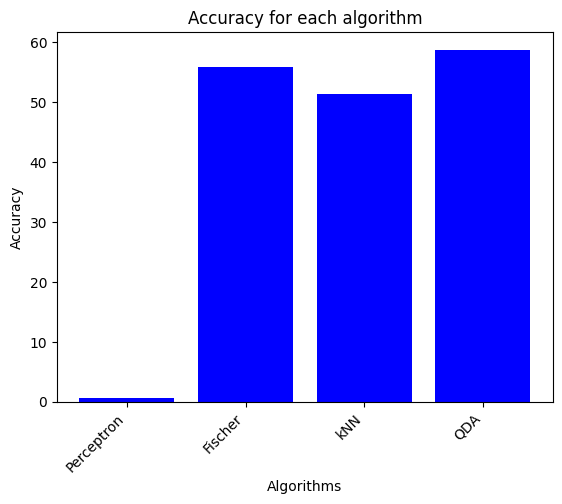

In [291]:
models = ["Perceptron", "Fischer", "kNN", "QDA"]

print(accuracies)

plt.bar(models, accuracies, color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy for each algorithm')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better visibility
plt.show()

### **Accuracy Comparison**
The accuracy of different models on the test set is as follows:

#### **Perceptron: 53.59%**
#### **Fisher Linear Discriminant: 55.88%**
#### **k-Nearest Neighbors (kNN): 51.45%**
#### **Quadratic Discriminant Analysis (QDA): 58.78%**
#### **Based on accuracy alone, QDA achieved the highest accuracy on the test set among the considered models.**

Algorithm-Specific Insights:
#### **1. Perceptron:**
The perceptron is a simple linear classifier. It performs adequately, but its simplicity might limit its ability to capture complex patterns in the data. It may struggle when the decision boundary is not linear.

#### **2. Fisher Linear Discriminant:**
The Fisher Linear Discriminant aims to find the linear combination of features that best separates the classes. It has shown improved accuracy compared to the perceptron, indicating that it captures more discriminative information from the data.

#### **3. k-Nearest Neighbors (kNN):**
kNN is a non-parametric and instance-based learning algorithm. It considers the local neighborhood of a data point to make predictions. The relatively lower accuracy might be due to sensitivity to irrelevant or noisy features, especially in high-dimensional spaces.

#### **4. Quadratic Discriminant Analysis (QDA):**
QDA is a probabilistic model that allows for non-linear decision boundaries. It has demonstrated the highest accuracy among the considered models. QDA may be more suitable when the underlying data distribution is non-linear.

#### **Overall Conclusion:**
QDA outperforms other models in terms of accuracy, suggesting its suitability for this classification task.
Consideration of Data Complexity: The decision to choose a model should consider the complexity of the underlying data distribution. More complex models like QDA and Fisher Linear Discriminant seem to perform well in this scenario.
Hyperparameter Tuning: For kNN, the choice of k (number of neighbors) significantly impacts performance. A systematic search for the optimal k value may further improve its accuracy.
This comparison provides insights into the strengths and limitations of each model, aiding in the selection of the most appropriate algorithm for the given classification task.

# **_7. References_**

1.   Dataset Description - https://www.hindawi.com/journals/cin/2022/9283293/
2.   EDA and Data Cleaning - https://www.kaggle.com/code/charmainechiam/dealing-with-missing-values-in-data-preparation

